In [3]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt comet_ml  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-411-gf4d8a84c Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.2/112.6 GB disk)


In [4]:
# Download and unzip the dataset
!curl -L -o coco128.zip https://github.com/ultralytics/yolov5/releases/download/v1.0/coco128.zip
!unzip -q coco128.zip -d .

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 6819k  100 6819k    0     0  6937k      0 --:--:-- --:--:-- --:--:-- 21.3M


In [5]:
data_yaml = """
train: coco128/images/train2017
val: coco128/images/train2017

nc: 80
names: [ 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train',
         'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign',
         'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep',
         'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella',
         'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
         'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard',
         'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon',
         'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot',
         'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant',
         'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
         'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink',
         'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear',
         'hair drier', 'toothbrush']
"""

with open("coco128/data.yaml", "w") as f:
    f.write(data_yaml)


In [6]:
!python train.py --img 640 --batch 16 --epochs 25 --data coco128/data.yaml --weights yolov5s.pt

2025-04-15 06:37:28.713625: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744699049.065771    6947 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744699049.175350    6947 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=coco128/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=25, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp

In [7]:
!python val.py --data coco128/data.yaml --weights runs/train/exp/weights/best.pt --img 640

val: data=coco128/data.yaml, weights=['runs/train/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-411-gf4d8a84c Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
val: Scanning /content/yolov5/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100% 128/128 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 4/4 [00:04<00:00,  1.20s/it]
                   all        128        929      0.886      0.811       0.89      0.662
Speed: 2.1ms pre-process, 11.2ms inference, 5.7ms NMS per image at shape (32, 3, 640, 640)
Results saved to runs/val/

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-411-gf4d8a84c Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


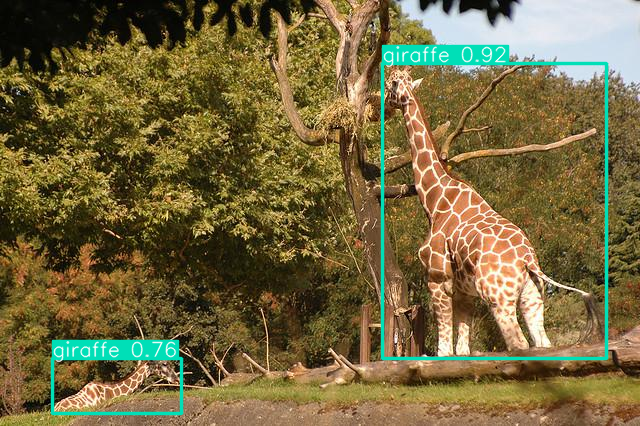

In [13]:
import torch
model= torch.hub.load('ultralytics/yolov5', 'custom', path='runs/train/exp/weights/best.pt')

img='coco128/images/train2017/000000000025.jpg'

result=model(img)
result.show()